In [161]:
#upload the packages

import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2

avocado = pd.read_csv('/Users/Michela/Documents/Kaggle/avocado.csv')



In [162]:
#look at the data
avocado.head()
avocado = avocado.drop(['Unnamed: 0', 'Date'], axis=1)

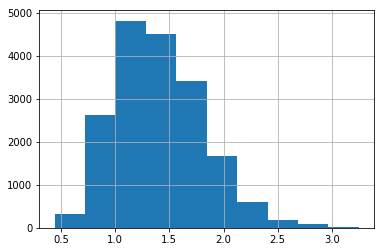

In [163]:
import matplotlib.pyplot as plt

avocado['AveragePrice'].hist()

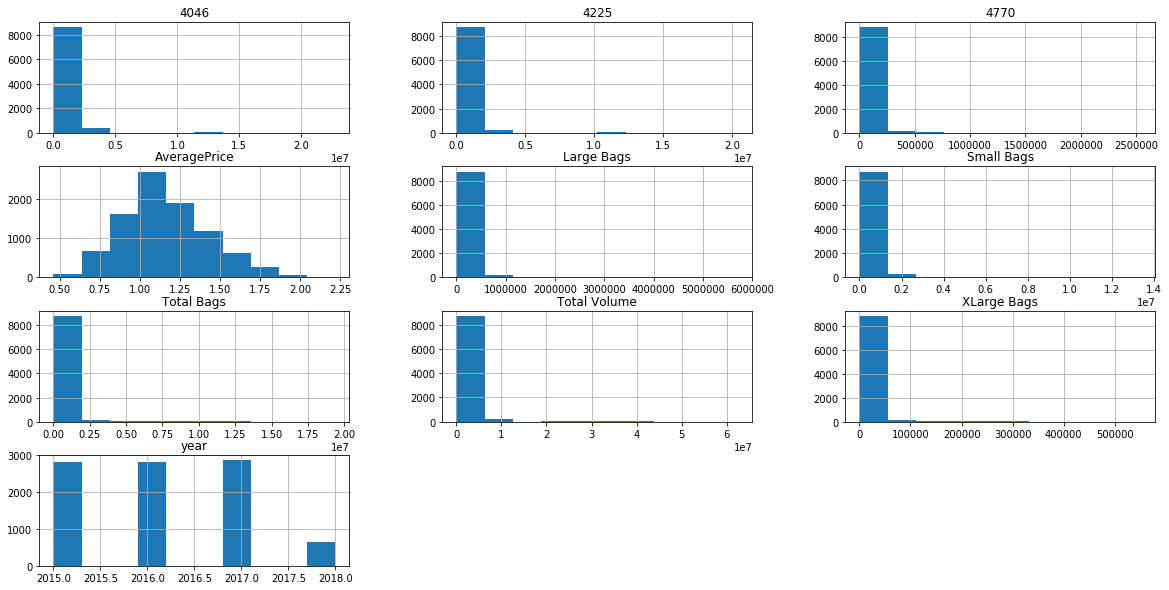

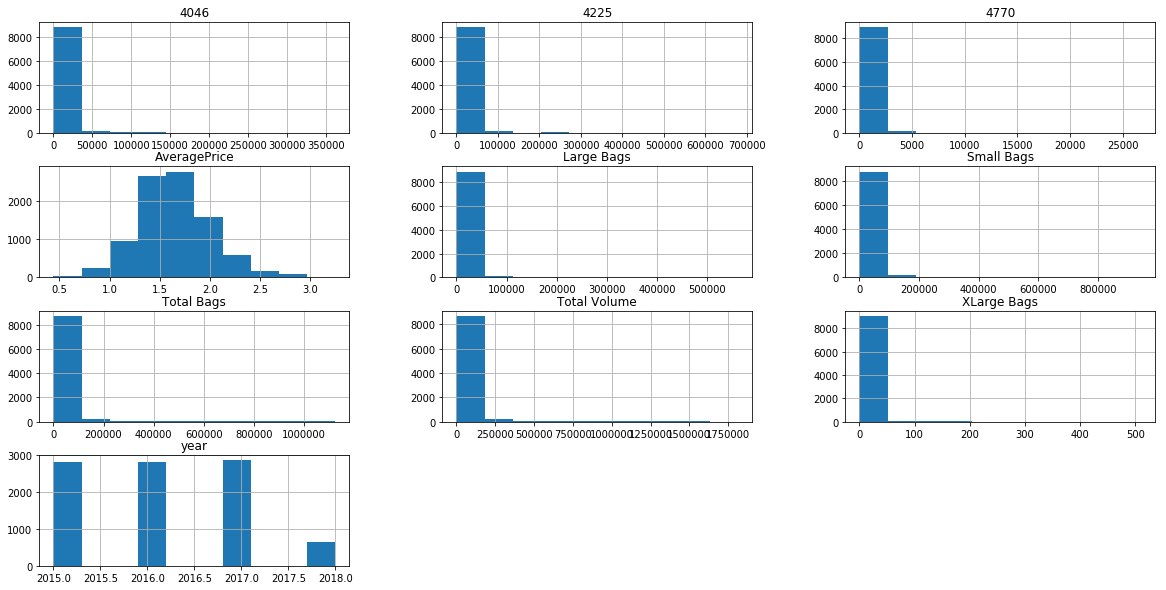

In [110]:
avocado.groupby('type').hist(figsize=(20,10))
plt.show()

In [111]:
avocado.describe();
avocado.isnull().sum()

#no NA values

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [ ]:
#results: organic corresponds to a higher price than conventional
#do a LRT for the different regions

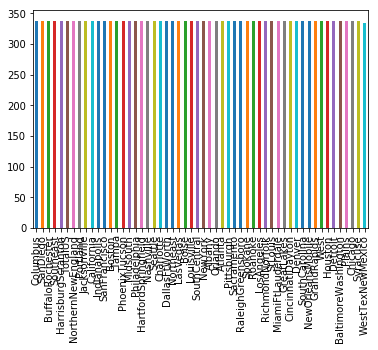

In [112]:
pd.value_counts(avocado['region']).plot(kind="bar")

In [8]:
#Q: Is there a difference between avocado prices? 

import statsmodels.api as sm
import statsmodels.formula.api as smf

model2 = smf.mixedlm(formula="AveragePrice ~ region", groups = avocado['region'], data=avocado).fit()

print(model2.summary())

                 Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     AveragePrice
No. Observations:       18249       Method:                 REML        
No. Groups:             54          Scale:                  0.1353      
Min. group size:        335         Likelihood:             -7776.0681  
Max. group size:        338         Converged:              Yes         
Mean group size:        337.9                                           
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                      1.561    0.368  4.238 0.000  0.839  2.283
region[T.Atlanta]             -0.223    0.521 -0.428 0.668 -1.244  0.798
region[T.BaltimoreWashington] -0.027    0.521 -0.051 0.959 -1.048  0.994
region[T.Boise]               -0.213    0.521 -0.409 0.683 -1.234  0.

/Users/Michela/anaconda3/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/Michela/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [9]:
model1 = smf.ols(formula="AveragePrice ~ 1", groups = avocado['region'], data=avocado).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Sat, 08 Sep 2018   Prob (F-statistic):                nan
Time:                        10:51:12   Log-Likelihood:                -9294.0
No. Observations:               18249   AIC:                         1.859e+04
Df Residuals:                   18248   BIC:                         1.860e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4060      0.003    471.674      0.0

/Users/Michela/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1554: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model



def lrt(null, alt):
    return(2*(null-alt))

LR=lrt(-9294,-7614) 
stats.chi2.pdf(LR, 1)


In [10]:
def lrt(null, alt):
    return(2*(null-alt))

LR=lrt(-9294,-7776.0681 ) 
stats.chi2.pdf(LR, 1)

#there is a statistical difference between the region and non-region models 
#- suggesting that region does controbute to the price

0.0

In [25]:
#next: how do the other variables contribute to price?

avocado.rename(columns={'Total Volume': 'Volume', 'Total Bags': 'TotalBags', 'Small Bags' : 'SmallBags', 'Large Bags' :'LargeBags',
                       'XLarge Bags' : 'XLargeBags'}, inplace=True)

model3 = smf.ols(formula="AveragePrice ~ region + type + Volume", groups = avocado['region'], data=avocado).fit()

print(model3.summary())

#organic corresponds to the higher price

#

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     400.4
Date:                Sat, 08 Sep 2018   Prob (F-statistic):               0.00
Time:                        11:08:43   Log-Likelihood:                -2056.6
No. Observations:               18249   AIC:                             4225.
Df Residuals:                   18193   BIC:                             4663.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [19]:
#avocado['Volume'].plot()

model4 = smf.ols(formula='AveragePrice~Volume', data=avocado).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     704.1
Date:                Sat, 08 Sep 2018   Prob (F-statistic):          2.94e-152
Time:                        10:59:21   Log-Likelihood:                -8948.6
No. Observations:               18249   AIC:                         1.790e+04
Df Residuals:                   18247   BIC:                         1.792e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4251      0.003    473.071      0.0

In [79]:
list(avocado)

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Volume',
 '4046',
 '4225',
 '4770',
 'TotalBags',
 'SmallBags',
 'LargeBags',
 'XLargeBags',
 'type',
 'year',
 'region']

In [20]:
model5 = smf.mixedlm(formula="AveragePrice ~ region + type + Volume + year + TotalBags + SmallBags + LargeBags + XLargeBags", groups = avocado['region'], data=avocado).fit()

print(model5.summary())



                   Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       AveragePrice
No. Observations:       18249         Method:                   REML        
No. Groups:             54            Scale:                    0.0719      
Min. group size:        335           Likelihood:               -2105.8988  
Max. group size:        338           Converged:                Yes         
Mean group size:        337.9                                               
----------------------------------------------------------------------------
                               Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
----------------------------------------------------------------------------
Intercept                     -78.205    4.364 -17.921 0.000 -86.758 -69.652
region[T.Atlanta]              -0.221    0.380  -0.582 0.560  -0.966   0.523
region[T.BaltimoreWashington]  -0.025    0.380  -0.066 0.947  -0.770   0.719
region[T.Boise]    

In [39]:
# a lot of LRT 

#LRT between region and no-region
#LRT between region+covariates and no region
def lrt(null, alt):
    return(2*(null-alt))

LR1=lrt(-9294,-7776.0681 ) 
print("The p-value for the LRT between the region mixed model and the intercept-only model is "  + str(stats.chi2.pdf(LR1, 1)))



LR2=lrt( -7776.0681, -2105.8988 ) 
print("The p-value for the LRT between the region mixed model and the region+covariates mixed model is "  + str(stats.chi2.pdf(LR2, 1)))





The p-value for the LRT between the region mixed model and the intercept-only model is 0.0
The p-value for the LRT between the region mixed model and the region+covariates mixed model is 0.0


In [63]:
#now time for some machine learning 

#shape avocado 
avocado.head()

,Unnamed: 0,Date,AveragePrice,Volume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [113]:
Y = avocado['AveragePrice']
X=avocado.drop(['AveragePrice'], axis=1)

In [114]:
X.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [115]:
Y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [164]:
organic_conv = pd.get_dummies(avocado['type'])
#print(organic_conv)
region = pd.get_dummies(avocado['region'])
avocado = avocado.join(organic_conv)
avocado = avocado.join(region)
#avocado.head()

In [195]:

avocado = avocado.drop('region', axis=1)
avocado = avocado.drop('type', axis=1)
print(avocado.shape)
list(avocado)


(18249, 66)


['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year',
 'conventional',
 'organic',
 'Albany',
 'Atlanta',
 'BaltimoreWashington',
 'Boise',
 'Boston',
 'BuffaloRochester',
 'California',
 'Charlotte',
 'Chicago',
 'CincinnatiDayton',
 'Columbus',
 'DallasFtWorth',
 'Denver',
 'Detroit',
 'GrandRapids',
 'GreatLakes',
 'HarrisburgScranton',
 'HartfordSpringfield',
 'Houston',
 'Indianapolis',
 'Jacksonville',
 'LasVegas',
 'LosAngeles',
 'Louisville',
 'MiamiFtLauderdale',
 'Midsouth',
 'Nashville',
 'NewOrleansMobile',
 'NewYork',
 'Northeast',
 'NorthernNewEngland',
 'Orlando',
 'Philadelphia',
 'PhoenixTucson',
 'Pittsburgh',
 'Plains',
 'Portland',
 'RaleighGreensboro',
 'RichmondNorfolk',
 'Roanoke',
 'Sacramento',
 'SanDiego',
 'SanFrancisco',
 'Seattle',
 'SouthCarolina',
 'SouthCentral',
 'Southeast',
 'Spokane',
 'StLouis',
 'Syracuse',
 'Tampa',
 'TotalUS',
 'West',
 'WestTexNewMexico']

In [196]:
y = np.array(avocado['AveragePrice'])

In [197]:
y

array([1.33, 1.35, 0.93, ..., 1.87, 1.93, 1.62])

In [198]:
x = avocado.drop('AveragePrice', axis=1)
x_names = list(x.columns)
print(x_names)
x = np.array(x)

['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'conventional', 'organic', 'Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston', 'BuffaloRochester', 'California', 'Charlotte', 'Chicago', 'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork', 'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento', 'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina', 'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse', 'Tampa', 'TotalUS', 'West', 'WestTexNewMexico']


In [199]:
#now we split the data into training and testing sets

from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size = 0.25)

#25% of the data is testing data, while we are training on 75%

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (13686, 65)
Training Labels Shape: (13686,)
Testing Features Shape: (4563, 65)
Testing Labels Shape: (4563,)


In [200]:
train_features.shape

(13686, 65)

In [203]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [209]:
#predict on the test set

predictions = rf.predict(test_features)


errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2) ,'$')


Mean Absolute Error: 0.1 $


In [210]:
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.29 %.


In [223]:
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]

export_graphviz(tree, out_file = 'tree.dot', feature_names = x_names, rounded = True, precision = 1)

In [224]:
(graph, ) = pydot.graph_from_dot_file('tree.dot')

In [228]:
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = x_names, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

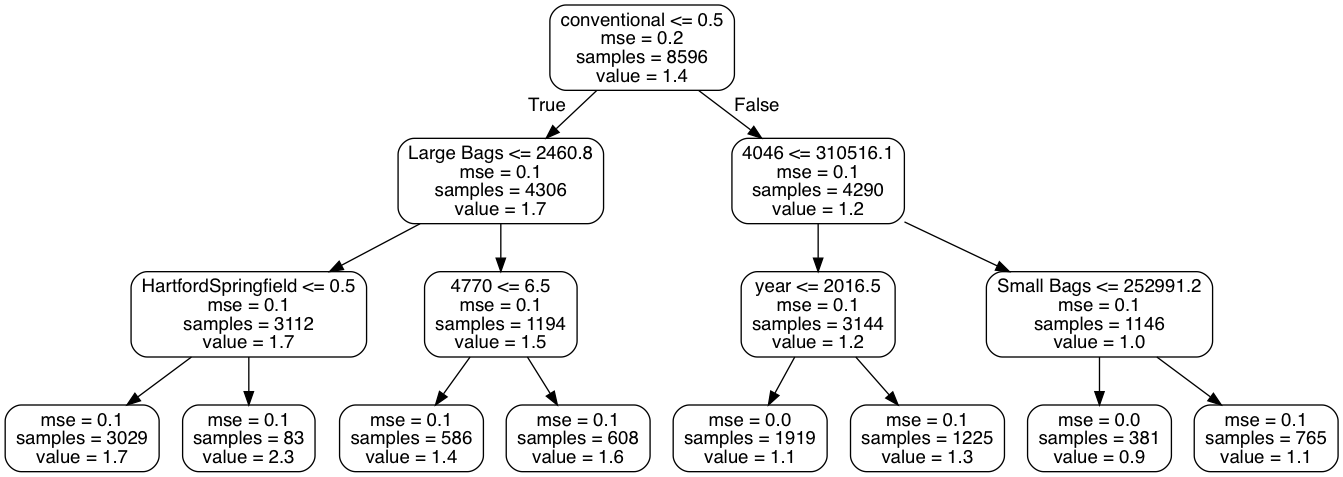

In [239]:
from IPython.display import Image
Image(filename='/Users/Michela/small_tree.png') 